In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing File
df = pd.read_excel('Stock Issues 1-12 August 2023.xlsx')
df.head()

,Date,Issued To,Item Name,Qty,Unit Price,Amount
0,2023-08-01,NaN,UNKNOWN,0.0,0.0,0.0
1,2023-08-01,NaN,Engine Oil Delo Silver SAE40/ Diesel Engine Oil,9.0,12000.0,108000.0
2,2023-08-01,NaN,"Oil Filter 04152-38020,YZZA4 L/C VDJ200R",1.0,48284.0,48284.0
3,2023-08-01,NaN,"Diesel Filter 23390-51070 - L/C Hzj 76,79,VDJ200R",1.0,39500.0,39500.0
4,2023-08-01,NaN,Air Cleaner 17801-51020 LC VDJ 200R,1.0,98034.0,98034.0


In [3]:
df.shape #Shape of our data - Rows and Columns

(1370, 6)

# Data Cleaning and Transformation

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1370 non-null   datetime64[ns]
 1   Issued To   0 non-null      float64       
 2   Item Name   1370 non-null   object        
 3   Qty         1187 non-null   float64       
 4   Unit Price  1179 non-null   float64       
 5   Amount      1179 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 64.3+ KB


In [5]:
#Changing date column data type to datetime
df["Date"] = pd.to_datetime(df["Date"], format="%A, %d %B %Y")
df.head()

,Date,Issued To,Item Name,Qty,Unit Price,Amount
0,2023-08-01,NaN,UNKNOWN,0.0,0.0,0.0
1,2023-08-01,NaN,Engine Oil Delo Silver SAE40/ Diesel Engine Oil,9.0,12000.0,108000.0
2,2023-08-01,NaN,"Oil Filter 04152-38020,YZZA4 L/C VDJ200R",1.0,48284.0,48284.0
3,2023-08-01,NaN,"Diesel Filter 23390-51070 - L/C Hzj 76,79,VDJ200R",1.0,39500.0,39500.0
4,2023-08-01,NaN,Air Cleaner 17801-51020 LC VDJ 200R,1.0,98034.0,98034.0


In [6]:
# Forward-fill missing dates
df["Date"].fillna(method="ffill", inplace=True)
df.head()

,Date,Issued To,Item Name,Qty,Unit Price,Amount
0,2023-08-01,NaN,UNKNOWN,0.0,0.0,0.0
1,2023-08-01,NaN,Engine Oil Delo Silver SAE40/ Diesel Engine Oil,9.0,12000.0,108000.0
2,2023-08-01,NaN,"Oil Filter 04152-38020,YZZA4 L/C VDJ200R",1.0,48284.0,48284.0
3,2023-08-01,NaN,"Diesel Filter 23390-51070 - L/C Hzj 76,79,VDJ200R",1.0,39500.0,39500.0
4,2023-08-01,NaN,Air Cleaner 17801-51020 LC VDJ 200R,1.0,98034.0,98034.0


In [7]:
# Replacing null values in "Issued To" column with the corresponding non-null value in "Item Name" column for only null values in QTy
df.loc[df["Issued To"].isnull() & df["Amount"]==0, "Issued To"] = df.loc[df["Issued To"].isnull() & df["Amount"]==0, "Item Name"]

df.head()

,Date,Issued To,Item Name,Qty,Unit Price,Amount
0,2023-08-01,UNKNOWN,UNKNOWN,0.0,0.0,0.0
1,2023-08-01,NaN,Engine Oil Delo Silver SAE40/ Diesel Engine Oil,9.0,12000.0,108000.0
2,2023-08-01,NaN,"Oil Filter 04152-38020,YZZA4 L/C VDJ200R",1.0,48284.0,48284.0
3,2023-08-01,NaN,"Diesel Filter 23390-51070 - L/C Hzj 76,79,VDJ200R",1.0,39500.0,39500.0
4,2023-08-01,NaN,Air Cleaner 17801-51020 LC VDJ 200R,1.0,98034.0,98034.0


In [8]:
# Forward-fill missing values in the Issued To Column
df["Issued To"].fillna(method="ffill", inplace=True)

In [9]:
df.replace(0, np.nan, inplace=True)
df.head(10)

,Date,Issued To,Item Name,Qty,Unit Price,Amount
0,2023-08-01,UNKNOWN,UNKNOWN,NaN,NaN,NaN
1,2023-08-01,UNKNOWN,Engine Oil Delo Silver SAE40/ Diesel Engine Oil,9.0,12000.0,108000.0
2,2023-08-01,UNKNOWN,"Oil Filter 04152-38020,YZZA4 L/C VDJ200R",1.0,48284.0,48284.0
3,2023-08-01,UNKNOWN,"Diesel Filter 23390-51070 - L/C Hzj 76,79,VDJ200R",1.0,39500.0,39500.0
4,2023-08-01,UNKNOWN,Air Cleaner 17801-51020 LC VDJ 200R,1.0,98034.0,98034.0
5,2023-08-01,NATIONAL WATER AND SEWERAGE CORPORATION(NWSC),NATIONAL WATER AND SEWERAGE CORPORATION(NWSC),NaN,NaN,NaN
6,2023-08-01,NATIONAL WATER AND SEWERAGE CORPORATION(NWSC),"Z-Link 48810-0K010 Lan,Kun25r",1.0,165000.0,165000.0
7,2023-08-01,NATIONAL WATER AND SEWERAGE CORPORATION(NWSC),"Z-Link 48820-0K030 Lan,Kun25r",1.0,165000.0,165000.0
8,2023-08-01,UPDF,UPDF,NaN,NaN,NaN
9,2023-08-01,UPDF,Rear Brake Pads 04466-60160 LC VDJ 200R/KD2388,1.0,240000.0,240000.0


In [10]:
# Droping rows with NaN values
df.dropna(inplace=True)

In [11]:
df.head(10)

,Date,Issued To,Item Name,Qty,Unit Price,Amount
1,2023-08-01,UNKNOWN,Engine Oil Delo Silver SAE40/ Diesel Engine Oil,9.0,12000.0,108000.0
2,2023-08-01,UNKNOWN,"Oil Filter 04152-38020,YZZA4 L/C VDJ200R",1.0,48284.0,48284.0
3,2023-08-01,UNKNOWN,"Diesel Filter 23390-51070 - L/C Hzj 76,79,VDJ200R",1.0,39500.0,39500.0
4,2023-08-01,UNKNOWN,Air Cleaner 17801-51020 LC VDJ 200R,1.0,98034.0,98034.0
6,2023-08-01,NATIONAL WATER AND SEWERAGE CORPORATION(NWSC),"Z-Link 48810-0K010 Lan,Kun25r",1.0,165000.0,165000.0
7,2023-08-01,NATIONAL WATER AND SEWERAGE CORPORATION(NWSC),"Z-Link 48820-0K030 Lan,Kun25r",1.0,165000.0,165000.0
9,2023-08-01,UPDF,Rear Brake Pads 04466-60160 LC VDJ 200R/KD2388,1.0,240000.0,240000.0
10,2023-08-01,UPDF,Handbrake Shoes 46530-34010 Lc Vdj 200,4.0,89500.0,358000.0
11,2023-08-01,UPDF,Bull Bar Assy - Land Cruiser VDJ 200R,1.0,5000000.0,5000000.0
13,2023-08-01,HON LATIF SSEBAGALA,Engine Oil Delo Silver SAE40/ Diesel Engine Oil,9.0,12000.0,108000.0


# Exploratory Data Analysis

In [12]:
df.shape

(1041, 6)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1041 entries, 1 to 1369
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1041 non-null   datetime64[ns]
 1   Issued To   1041 non-null   object        
 2   Item Name   1041 non-null   object        
 3   Qty         1041 non-null   float64       
 4   Unit Price  1041 non-null   float64       
 5   Amount      1041 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 56.9+ KB


<b>Client exploration</b>

In [14]:
df['Issued To'].nunique()

113

We have 113 different clients from the month of August

<b>Top Loyal clients</b>

In [15]:
top20 = df['Issued To'].value_counts().head(20)
top20

Issued To
UPDF                                    151
STATE HOUSE GARAGE                       73
Min of Defence(M.O.D)                    42
JANET MUHAKANIZI                         37
MIN OF WATER AND ENVIROMENT(M.O.W.E)     36
MIN OF I.C.T                             32
UGANDA REVENUE AUTHORITY                 31
WORLD VISION                             27
NRM SEC                                  25
Sanlam/ Blue Pearl Company Ltd           25
MIN OF FINANCE(M.O.F)                    24
UGRANDI HOLDING LTD                      23
BOB KABONERO                             21
PETER TUKEI                              21
UAP/WORLD VISION                         18
Frontis Residence                        18
Hon Justice Phillip Odoki                17
AIKIRIZA ESTHER -NEW                     15
CIC INSURANCE                            15
Kitara Geargo C/o FAO                    15
Name: count, dtype: int64

<Axes: ylabel='Issued To'>

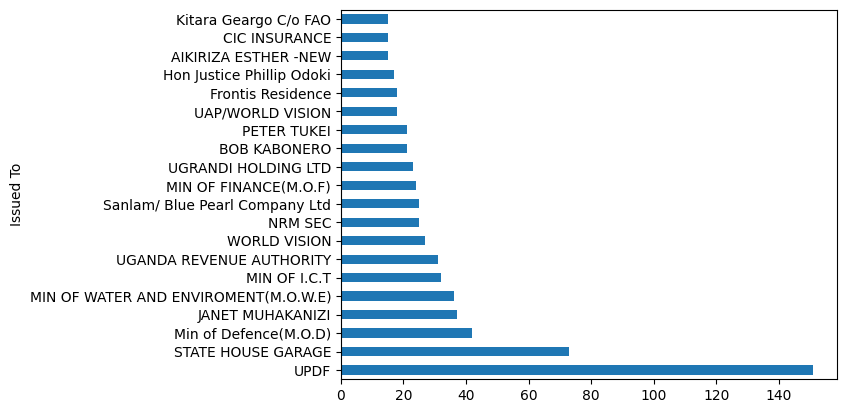

In [16]:
top20.plot(kind = 'barh')

In [17]:
last20 = df['Issued To'].value_counts().tail(20)
last20

Issued To
LIBERTY INS/ MANUU VARSANI                             2
WAR CHILDHOLLAND                                       2
PIUS BIGIRIMANA                                        1
KIKAGATI POWER(K.P)                                    1
SANLAM                                                 1
STRONG MINDS                                           1
Uganda Business And Technical Examination Board-UBT    1
MANISH VARSANI                                         1
BTS CLEANING AND FORWERING LTD                         1
UEGCL 1                                                1
HON CHEIF JUSTICE BENJAMIN ODOKI                       1
HON ANN TUMWINE                                        1
Uganda Blood Transfusion Service (U.B.T.S)             1
Ministry of Agriculture                                1
Water And Santation Develoment(W.S.D)                  1
DAVID                                                  1
HON ANNA                                               1
China Forestry       

<b>Items Exploration</b>

In [18]:
df.head(1)

,Date,Issued To,Item Name,Qty,Unit Price,Amount
1,2023-08-01,UNKNOWN,Engine Oil Delo Silver SAE40/ Diesel Engine Oil,9.0,12000.0,108000.0


In [19]:
df['Item Name'].nunique()

298

The store has 298 unique items

<b>Fast Moving items</b>

In [20]:
fast_moving_items = df['Item Name'].value_counts().head(100)
fast_moving_items

Item Name
Engine Oil Delo Silver SAE40/ Diesel Engine Oil    69
Oil Filter 90915-YZZD2 - HILUX  90915-20003        29
Thinner Standard                                   28
Strainers                                          28
Black Duco                                         26
                                                   ..
Clutch Plate 31250-60382, 60383PRADO KDJ 150R       2
Wheel Nut Sport 5L                                  2
Air Cleaner 17801-30070 Hiace Kdh222r               2
Frt Windscreen-Hilux Newmodel                       2
Battery Maintanance Free 80D26(N70ZL)               2
Name: count, Length: 100, dtype: int64

<b>Amount Generated by each item</b>

In [21]:
# Calculating the amount generated by each item by multiplication
df["Total Amount"] = df["Qty"] * df["Unit Price"]

# Top 50 items based on the total amount
top_50_items = df.groupby("Item Name")["Total Amount"].sum().nlargest(50)
print(top_50_items)

Item Name
Yokohama 265/65 R17 PRADO LJ 120                       30800000.0
GT SAVERO TYRES 265/70R16                              21200000.0
Slow Thinner 601                                       11675000.0
Bfgoodrich Tyres 285/55R20 L/cv8                       10800000.0
Engine Oil Delo Silver SAE40/ Diesel Engine Oil         7012483.0
G.T SARVERO TYRES 265/65R17                             6990000.0
GT SAVERO 285/50R20 LEXUS                               5185000.0
Bull Bar Assy - Land Cruiser VDJ 200R                   5000000.0
Brake Pads Frt 04465-60320 Prado/ KD2482                4035700.0
Dunlop Tyres 285/60R18 L/c Vdj                          3800000.0
Brake Pad FRT  04465-60280 L/c VDJ 200R/KD2387          3451000.0
Ignite Battery 75AH MF N-70ZL                           3433000.0
Dunlop Tyres 275/50R21 Lexus                            3400000.0
Thinner Clear                                           3260000.0
Yokohama Tyre 285/70R17                                 2991236.0


<b>Trend Analysis</b>

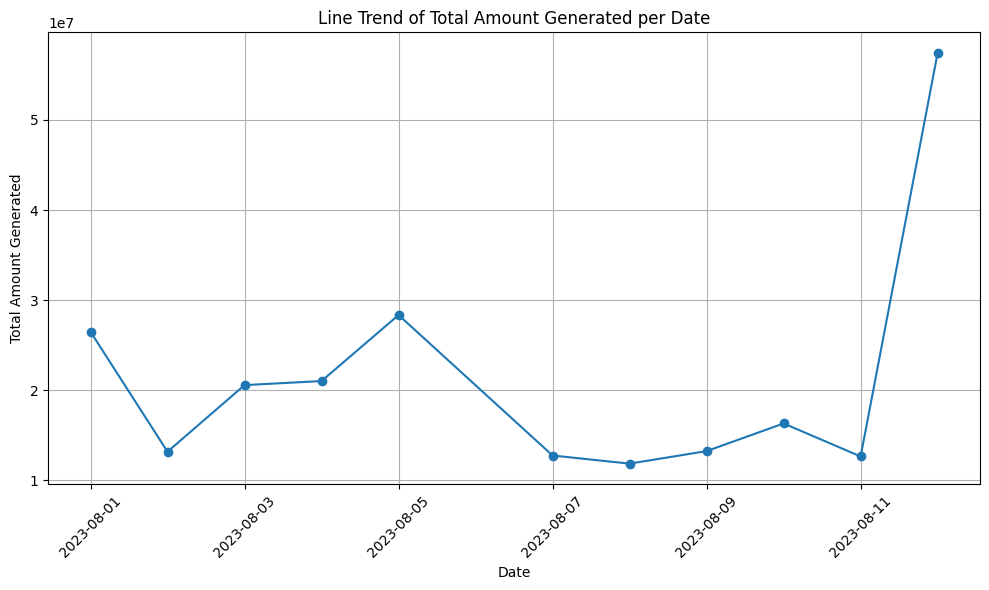

In [22]:
# Calculate the sum of total amount generated per date
date_total = df.groupby("Date")["Total Amount"].sum()

# Plot the line trend
plt.figure(figsize=(10, 6))
plt.plot(date_total.index, date_total.values, marker='o')
plt.title("Line Trend of Total Amount Generated per Date")
plt.xlabel("Date")
plt.ylabel("Total Amount Generated")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

<b>Exporting File to Excel</b>

In [23]:
df.to_excel('Stock Issues 1-12 August 2023 clean.xlsx', index = False)